The Black-Scholes formula for a call option is:

$$C = S_0 N(d_1) - K e^{-rT} N(d_2)$$


where 

$S_0$ is the current stock price, 

$K$ is the strike price, 

$r$ is the risk-free interest rate, 

$T$ is the time to expiration, and 

$N(x)$ is the cumulative distribution function of the standard normal distribution. 

The parameters $d_1$ and $d_2$ are defined as:
$$d_1 = \frac{\ln(S_0 / K) + (r + \sigma^2 / 2) T}{\sigma \sqrt{T}}$$
$$d_2 = d_1 - \sigma \sqrt{T}$$
where $\sigma$ is the volatility of the stock. 
The Black-Scholes formula can be used to price European call options, which are options that can only be exercised at the expiration date. However, it can also be used to price American call options, which can be exercised at any time before the expiration date. 

The Black-Scholes formula for a put option is:
$$P = K e^{-rT} N(-d_2) - S_0 N(-d_1)$$
where $P$ is the price of the put option, $S_0$ is the current stock price, $K$ is the strike price, $r$ is the risk-free interest rate, $T$ is the time to expiration, and $N(x)$ is the cumulative distribution function of the standard normal distribution. 
The parameters $d_1$ and $d_2$ are defined as:
$$d_1 = \frac{\ln(S_0 / K) + (r + \sigma^2 / 2) T}{\sigma \sqrt{T}}$$
$$d_2 = d_1 - \sigma \sqrt{T}$$
where $\sigma$ is the volatility of the stock. 
The Black-Scholes formula can be used to price European put options, which are options that can only be exercised at the expiration date. However, it can also be used to price American put options, which can be exercised at any time before the expiration date. 

IV is the market’s expectation of how much a stock will move in the future.

	•	It’s derived from the price of options, not from historical price movement.

	•	It does not say direction — just expected magnitude.
    
	•	Expressed as an annualized percentage.

In [1]:
import os
print (os.getcwd())

/Users/jayren/Desktop/Pair Trading/Option Functions


In [ ]:
import yfinance as yf
import pandas as pd

def get_options(ticker,expiry_date):
    stock = yf.Ticker(ticker)
    opt_chain = stock.option_chain(expiry_date)
    calls = opt_chain.calls
    puts = opt_chain.puts
    return calls, puts, stock

calls, puts, stock = get_options('GOOGL', '2025-07-25')

#print(calls[['lastPrice', 'bid','ask', 'strike', 'impliedVolatility']].sort_values(by='lastPrice', ascending=False).head(10))
def get_mid_price(strike):
    return {
        'call_mid_price': (calls[calls['strike'] == strike]['bid'].values[0] + calls[calls['strike'] == strike]['ask'].values[0]) / 2,
        'put_mid_price': (puts[puts['strike'] == strike]['bid'].values[0] + puts[puts['strike'] == strike]['ask'].values[0]) / 2 
    }
    

K=170
#test=calls[calls['strike'] == K][['strike', 'bid','ask', 'lastPrice', 'impliedVolatility']]
test=get_mid_price(170)
value =test['call_mid_price']
print(calls)

          contractSymbol             lastTradeDate  strike  lastPrice    bid  \
0   GOOGL250725C00105000 2025-06-23 14:01:40+00:00   105.0      61.08  65.30   
1   GOOGL250725C00120000 2025-06-20 13:45:51+00:00   120.0      54.60  50.80   
2   GOOGL250725C00125000 2025-06-16 14:23:49+00:00   125.0      47.80  45.00   
3   GOOGL250725C00130000 2025-06-25 14:13:13+00:00   130.0      40.75  40.10   
4   GOOGL250725C00135000 2025-06-17 14:26:50+00:00   135.0      41.93  36.00   
5   GOOGL250725C00140000 2025-06-24 19:33:11+00:00   140.0      31.40  30.35   
6   GOOGL250725C00145000 2025-06-25 15:56:08+00:00   145.0      26.20  26.45   
7   GOOGL250725C00150000 2025-06-24 16:02:58+00:00   150.0      22.05  20.90   
8   GOOGL250725C00155000 2025-06-25 18:29:30+00:00   155.0      17.60  16.40   
9   GOOGL250725C00160000 2025-06-25 19:21:33+00:00   160.0      13.50  12.80   
10  GOOGL250725C00165000 2025-06-25 19:54:57+00:00   165.0      10.10   9.80   
11  GOOGL250725C00170000 2025-06-25 19:5

In [2]:
import yfinance as yf

ticker = yf.Ticker("NVDA")

# Print all available expiration dates
expiry_dates = ticker.options
print("All Expiry Dates:")
for date in expiry_dates:
    print(date)

# Print all strikes for each expiry date
for date in expiry_dates:
    option_chain = ticker.option_chain(date)
    strikes = sorted(set(option_chain.calls['strike']).union(option_chain.puts['strike']))
    print(f"\nStrikes for expiry date {date}:")
    for strike in strikes:
        print(f"Strike: {strike}")

All Expiry Dates:
2025-07-03
2025-07-11
2025-07-18
2025-07-25
2025-08-01
2025-08-15
2025-09-19
2025-10-17
2025-11-21
2025-12-19
2026-01-16
2026-03-20
2026-05-15
2026-06-18
2026-09-18
2026-12-18
2027-01-15
2027-06-17
2027-12-17

Strikes for expiry date 2025-07-03:
Strike: 10.0
Strike: 15.0
Strike: 20.0
Strike: 25.0
Strike: 30.0
Strike: 35.0
Strike: 40.0
Strike: 45.0
Strike: 55.0
Strike: 60.0
Strike: 65.0
Strike: 70.0
Strike: 75.0
Strike: 80.0
Strike: 85.0
Strike: 90.0
Strike: 95.0
Strike: 100.0
Strike: 105.0
Strike: 110.0
Strike: 115.0
Strike: 119.0
Strike: 120.0
Strike: 121.0
Strike: 122.0
Strike: 123.0
Strike: 124.0
Strike: 125.0
Strike: 126.0
Strike: 127.0
Strike: 128.0
Strike: 129.0
Strike: 130.0
Strike: 131.0
Strike: 132.0
Strike: 133.0
Strike: 134.0
Strike: 135.0
Strike: 136.0
Strike: 137.0
Strike: 138.0
Strike: 139.0
Strike: 140.0
Strike: 141.0
Strike: 142.0
Strike: 143.0
Strike: 144.0
Strike: 145.0
Strike: 146.0
Strike: 147.0
Strike: 148.0
Strike: 149.0
Strike: 150.0
Strike: 152

In [ ]:
#calculate implied volatility using Black-Scholes model
# great to use

import yfinance as yf
import pandas as pd
from datetime import datetime, date  # Added this import
from numpy import log, sqrt, exp
from scipy.stats import norm
from scipy.stats import norm
from scipy.optimize import newton
import numpy as np

def get_options(ticker,expiry_date):
    stock = yf.Ticker(ticker)
    opt_chain = stock.option_chain(expiry_date)
    calls = opt_chain.calls
    puts = opt_chain.puts
    return calls, puts, stock



#verifying IV with black-scholes model


def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)

def implied_vol(C, S, K, T, r, initial_sigma=0.2):
    return newton(
        lambda sigma: black_scholes_call(S, K, T, r, sigma) - C,
        x0=initial_sigma
    )

def black_scholes_put(S, K, T, r, sigma):
    """
    Calculate the Black-Scholes price for a European put option.
    """
    from numpy import log, sqrt, exp
    from scipy.stats import norm

    d1 = (log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)
    put_price = K * exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price


ticker = 'GOOGL'  # Define the stock ticker
expiry_date = "2026-06-18"  # Define the expiry date

expiry_dt = datetime.strptime(expiry_date, "%Y-%m-%d")
calls, puts, stock = get_options(ticker, expiry_date)

# Example: call option
S = stock.history(period='1d')['Close'][-1]  # Current stock price
K = 95  # Strike price
T = (expiry_dt - datetime.now()).days / 365  # Exact days-to-expiry
r = 0.0   # Risk-free rate
C = calls[calls['strike']==K]['lastPrice'].values[0]   # Market price of call option

print( f"Current Stock Price: {S:.2f}", f"Strike Price: {K}",
      'expiry_date:', expiry_date,
      f"Time to Expiry: {T:.2f}", f"Risk-free rate: {r:.2%}", 
      f"Market Price of Call Option: {C:.2f}", sep='\n', end='\n\n')


iv_calculated = implied_vol(C, S, K, T, r)
print(f"Calculated IV: {iv_calculated:.2%}")

from py_vollib.black_scholes import implied_volatility
iv = implied_volatility.implied_volatility(
    price=C,
    S=S,
    K=K,
    t=T,
    r=r,
    flag='c'  # 'c' for call, 'p' for put
)
print(f"py_vollib Calculated IV: {iv:.2%}", '\n')

print(calls[calls['strike'] == K][['lastPrice', 'bid', 'ask', 'impliedVolatility']],'\n')
print(stock.history(period='1d')['Close'][-1])  # Print the last closing price of the stock

Current Stock Price: 171.80
Strike Price: 95
expiry_date:
2026-06-18
Time to Expiry: 0.98
Risk-free rate: 0.00%
Market Price of Call Option: 78.00

Calculated IV: 38.27%
   lastPrice   bid   ask  impliedVolatility
9       78.0  80.4  82.0            0.53449 

171.8043975830078


/var/folders/zv/byjsmvy90d57p6xyyc10dt240000gn/T/ipykernel_17094/3922643870.py:56: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/zv/byjsmvy90d57p6xyyc10dt240000gn/T/ipykernel_17094/3922643870.py:83: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



0.075 0.05 0.675 0.025
Debit Spread: Long Call 95 at $11.55, Short Call 105 at $2.50
BMO IV: 85.79%, HV: 8.57%, Price: $106.95


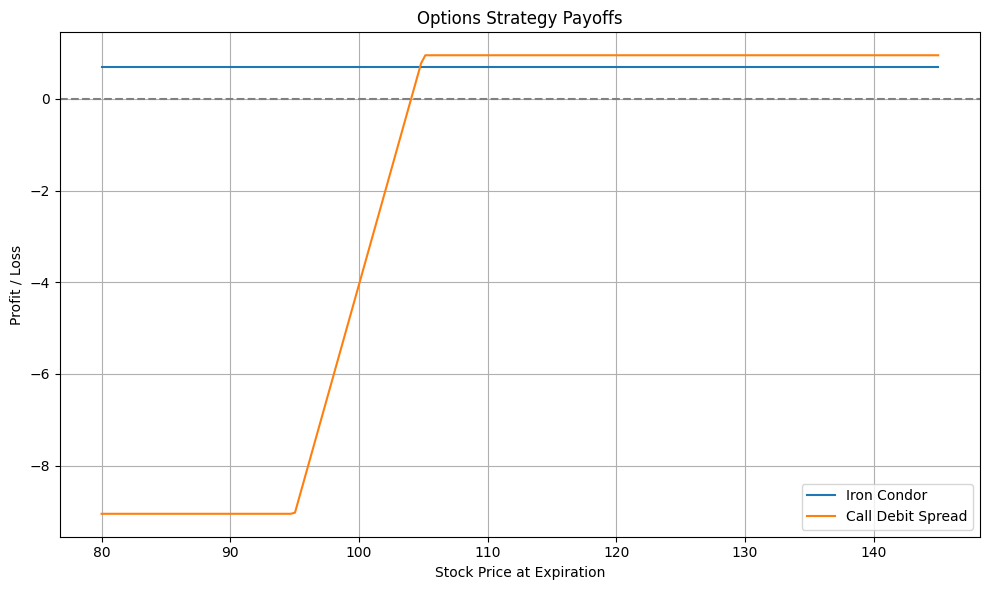

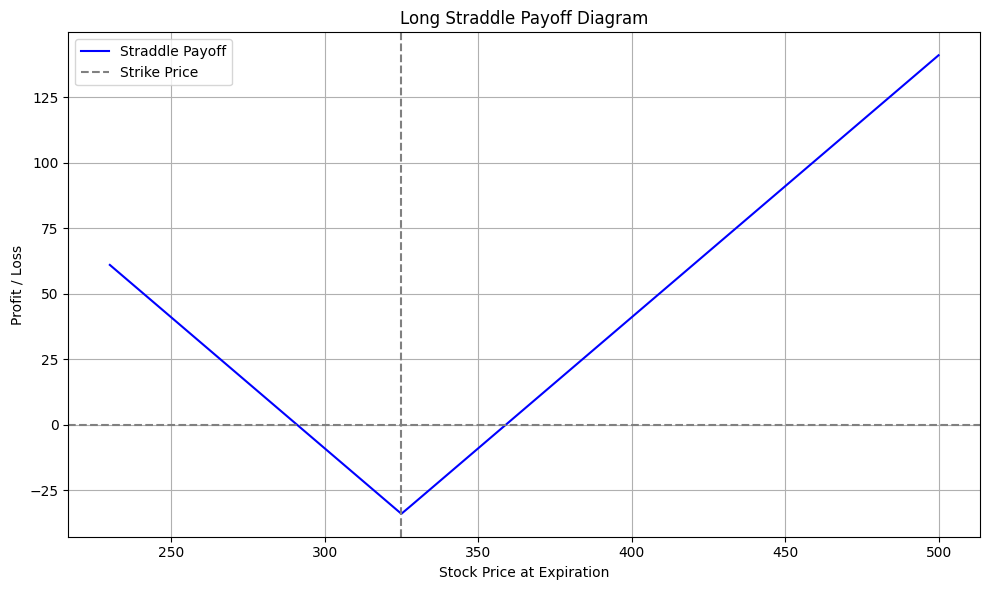

In [ ]:
# options_strategy_tool.py
tik="BMO"

import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# --- Step 1: Pull IV/HV Data from yfinance ---
def fetch_iv_hv(ticker, window=20):
    stock = yf.Ticker(ticker)
    hist = stock.history(period="5y", interval="1d")
    
    hist['Daily Return'] = hist['Close'].pct_change()
    hv = hist['Daily Return'].rolling(window=window).std() * np.sqrt(252)
    latest_price = hist['Close'].iloc[-1]
    try:
        options_date = stock.options[0]  # nearest expiry
        opt_chain = stock.option_chain(options_date)
        calls = opt_chain.calls
        puts = opt_chain.puts
        iv_mean = pd.concat([calls['impliedVolatility'], puts['impliedVolatility']]).mean()
    except Exception:
        iv_mean = np.nan

    return {
        "latest_price": float(latest_price),
        "historical_volatility": float(hv.iloc[-1]),
        "latest_iv": float(iv_mean) if not np.isnan(iv_mean) else None,
        "implied_volatility": float(iv_mean),
        "hist_df": hist,
        "stock": stock
        
    }

def get_options(ticker,expiry_date):
    stock = yf.Ticker(ticker)
    opt_chain = stock.option_chain(expiry_date)
    calls = opt_chain.calls
    puts = opt_chain.puts
    return calls, puts, stock

#print(calls[['lastPrice', 'bid','ask', 'strike', 'impliedVolatility']].sort_values(by='lastPrice', ascending=False).head(10))
def get_mid_price(strike):
    return {
        'call_mid_price': (calls[calls['strike'] == strike]['bid'].values[0] + calls[calls['strike'] == strike]['ask'].values[0]) / 2,
        'put_mid_price': (puts[puts['strike'] == strike]['bid'].values[0] + puts[puts['strike'] == strike]['ask'].values[0]) / 2 
    }
# --- Step 2: Backtest Payoff for Iron Condor and Debit Spread ---
# Iron Condor Strategy:
	# 1.	Sell 1 out-of-the-money call (higher strike)
	# 2.	Buy 1 further out-of-the-money call (even higher strike)

	# 3.	Sell 1 out-of-the-money put (lower strike)
	# 4.	Buy 1 further out-of-the-money put (even lower strike)

# Call Debit Spread Strategy, also called Bull Call Spread:
    # 1.	Buy 1 in-the-money call (lower strike)
    # 2.	Sell 1 in-the-money call (higher strike)


def iron_condor_payoff(spot_prices, low_put, high_put, low_call, high_call, credit):
    payoff = []
    width_put = high_put - low_put
    width_call = high_call - low_call
    for S in spot_prices:
        if S < low_put:
            result = credit - width_put
        elif low_put <= S < high_put:
            result = credit - (S - low_put)
        elif high_put <= S <= low_call:
            result = credit
        elif low_call < S <= high_call:
            result = credit - (high_call - S)
        else:  # S > high_call
            result = credit - width_call
        payoff.append(result)
    return np.array(payoff)

def call_debit_spread_payoff(spot_prices, long_call, short_call, debit):
    payoff = []
    for S in spot_prices:
        value = np.maximum(0, S - long_call) - np.maximum(0, S - short_call)
        payoff.append(value - debit)
    return np.array(payoff)

# --- Step 3: Visualize Payoffs ---
def plot_payoffs(spot_prices, iron_condor, debit_spread):
    plt.figure(figsize=(10, 6))
    plt.plot(spot_prices, iron_condor, label="Iron Condor")
    plt.plot(spot_prices, debit_spread, label="Call Debit Spread")
    plt.axhline(0, color='gray', linestyle='--')
    plt.title("Options Strategy Payoffs")
    plt.xlabel("Stock Price at Expiration")
    plt.ylabel("Profit / Loss")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    
# Iron Condor Strategy:
	# 1.	Sell 1 out-of-the-money call (higher strike)
	# 2.	Buy 1 further out-of-the-money call (even higher strike)

	# 3.	Sell 1 out-of-the-money put (lower strike)
	# 4.	Buy 1 further out-of-the-money put (even lower strike)

# Call Debit Spread Strategy, also called Bull Call Spread:
    # 1.	Buy 1 in-the-money call (lower strike)
    # 2.	Sell 1 in-the-money call (higher strike)

# --- Example Usage ---

ticker = "BMO"
expiry_date = "2026-06-18"  # Define the expiry date
expiry_dt = pd.to_datetime(expiry_date)
lowput=85
highput=95
lowcall=110
highcall=115

calls, puts, stock = get_options(ticker, expiry_date)

lowcall = get_mid_price(lowcall)['call_mid_price']
highcall = get_mid_price(highcall)['call_mid_price']
lowput = get_mid_price(lowput)['put_mid_price']
highput = get_mid_price(highput)['put_mid_price']
#print(f"Call Mid Price: {value['call_mid_price']:.2f}, Put Mid Price: {value['put_mid_price']:.2f}")
print(lowcall, highcall, lowput, highput)

#debit spread
#debit spread credit= high call in the money - low call in the money
d_lowstrike = 95
d_highstrike = 105
d_lowcall = get_mid_price(d_lowstrike)['call_mid_price']
d_highcall = get_mid_price(d_highstrike)['call_mid_price']
print(f"Debit Spread: Long Call {d_lowstrike} at ${d_lowcall:.2f}, Short Call {d_highstrike} at ${d_highcall:.2f}")

if __name__ == "__main__":
    ticker = ticker
    data = fetch_iv_hv(ticker)
    print(f"{ticker} IV: {data['implied_volatility']:.2%}, HV: {data['historical_volatility']:.2%}, Price: ${data['latest_price']:.2f}")

    # Define strikes and premiums
    iron_condor = iron_condor_payoff(
        spot_prices=np.linspace(80, 145, 200),
        low_put=lowput, high_put=highput,
        low_call=lowcall, high_call=highcall,
        credit=lowcall-highcall + lowput-highput
    )

    debit_spread = call_debit_spread_payoff(
        spot_prices=np.linspace(80, 145, 200),
        long_call=d_lowstrike, short_call=d_highstrike,
        debit=d_lowcall-d_highcall 
    )

    plot_payoffs(np.linspace(80, 145, 200), iron_condor, debit_spread)


# straddle_payoff_sim.py

def straddle_payoff(spot_prices, strike_price, call_premium, put_premium):
    total_cost = call_premium + put_premium
    call_payoff = np.maximum(spot_prices - strike_price, 0)
    put_payoff = np.maximum(strike_price - spot_prices, 0)
    total_payoff = call_payoff + put_payoff - total_cost
    return total_payoff

def plot_straddle(spot_prices, payoff, strike_price):
    plt.figure(figsize=(10, 6))
    plt.plot(spot_prices, payoff, label='Straddle Payoff', color='blue')
    plt.axhline(0, color='gray', linestyle='--')
    plt.axvline(strike_price, color='gray', linestyle='--', label='Strike Price')
    plt.title("Long Straddle Payoff Diagram")
    plt.xlabel("Stock Price at Expiration")
    plt.ylabel("Profit / Loss")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    strike = 325
    call_price = 17
    put_price = 17
    spot_range = np.linspace(230, 500, 200)

    payoff = straddle_payoff(spot_range, strike, call_price, put_price)
    plot_straddle(spot_range, payoff, strike)


[*********************100%***********************]  1 of 1 completed


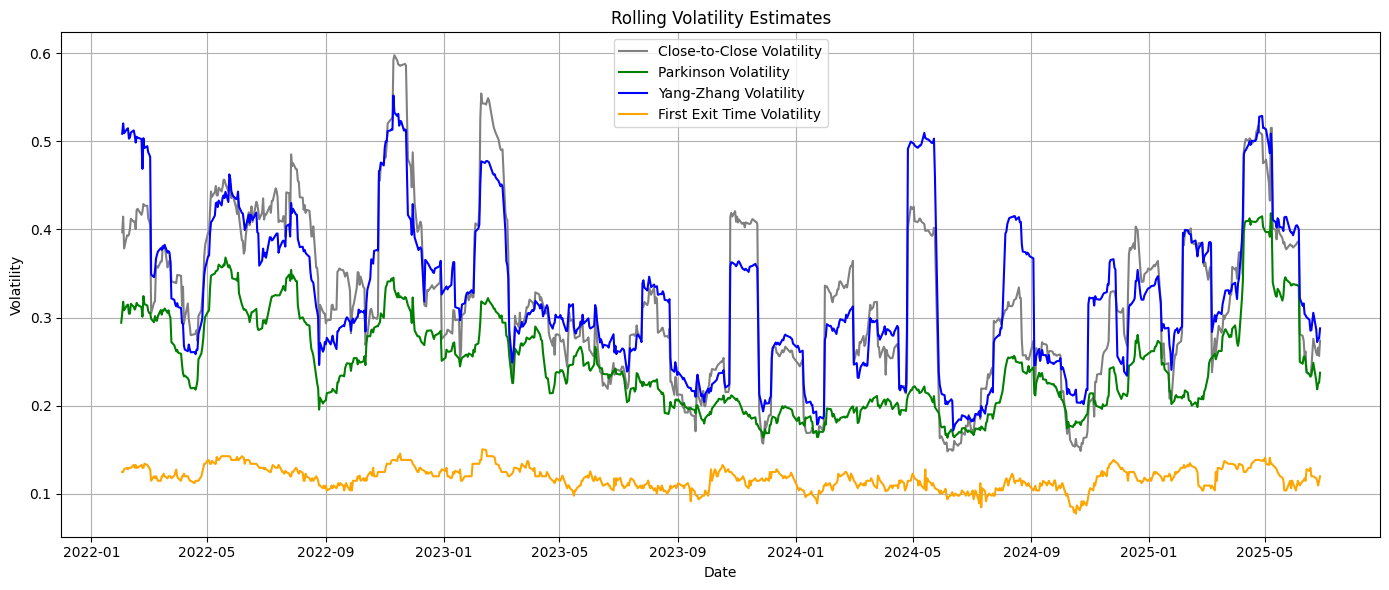

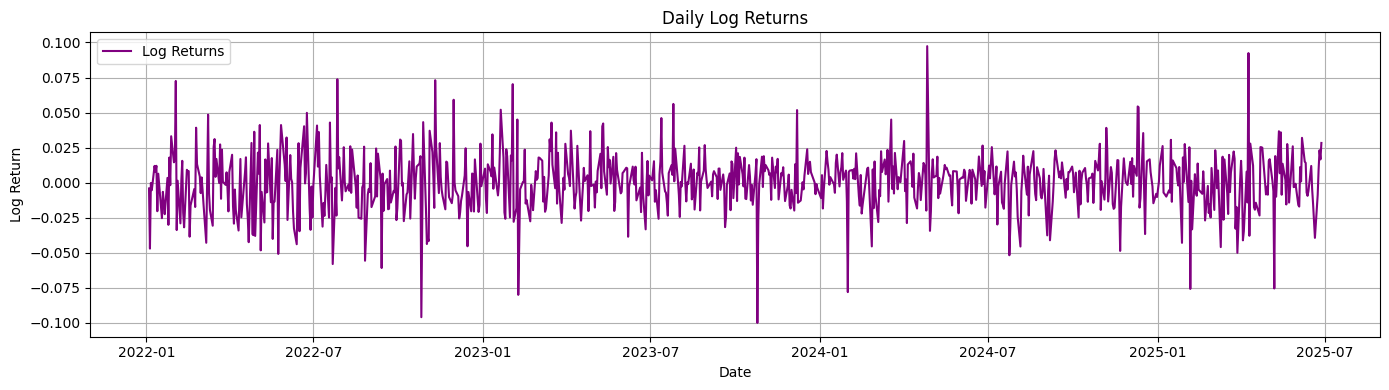

/var/folders/zv/byjsmvy90d57p6xyyc10dt240000gn/T/ipykernel_52208/1158329382.py:235: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

/var/folders/zv/byjsmvy90d57p6xyyc10dt240000gn/T/ipykernel_52208/1158329382.py:242: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



Statistics for Daily Log Returns:
Mean: 0.000245
Std Dev: 0.020936
Min: -0.099924
Max: 0.097348
Skewness: -0.145520
Kurtosis: 2.765662
25% Quantile: -0.011738
Median: 0.000931
75% Quantile: 0.011951
Count: 873.000000


In [6]:
#multiple rolling volatility estimators

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import os

symbol = "GOOGL"  # You can change this to any stock ticker you want
start_date = "2022-01-01"
end_date = "2026-01-01"
rolling_window = 21  # 21 trading days in a month
delta_num = 0.01  # Delta for First Exit Time Volatility

windows = [20, 30, 40, 60, 120, 240]
#get local csv files

def get_csv_files(path, filename):
    full_path = os.path.join(path, filename)
    df=pd.read_csv(full_path)
    ticker=df['ticker'].unique().tolist()
    #price_data = df.pivot_table(index='Datetime', columns='ticker', values='Close')
    return df, ticker

path = '/Users/jayren/Desktop/stock/Stock_Daily'
dailydata = '/Users/jayren/Desktop/stock/stock_Daily/dailydata'
consolidated = '/stockPrice_consolidated'


#us: us_stock_price.csv
# ca: ca_stock_price.csv
# adhoc: adhoc_stock_price.csv



# --- Step 1: Download Data ---
def fetch_data(ticker=symbol, start=start_date, end=end_date):
    df = yf.download(ticker, start=start, end=end)
    df = df[['Open', 'High', 'Low', 'Close']]
    df.dropna(inplace=True)
    return df

# --- Step 2: Log Return ---
def compute_log_returns(df):
    return np.log(df['Close'] / df['Close'].shift(1))

# --- Step 3: Volatility Estimators ---
def close_to_close_vol(df, window=rolling_window):
    log_ret = compute_log_returns(df)
    return log_ret.rolling(window).std() * np.sqrt(252)

def parkinson_vol(df, window=rolling_window):
    factor = 1 / (4 * np.log(2))
    log_hl = np.log(df['High'] / df['Low']) ** 2
    return (log_hl.rolling(window).mean() * factor) ** 0.5 * np.sqrt(252)

def yang_zhang_volatility_multi_windows(df, window_list):
    """
    Calculate Yang-Zhang volatility for multiple rolling windows.
    Returns a dictionary: {window_size: volatility_series}
    """
    results = {}
    results = {}
    o = df['Open']
    h = df['High']
    l = df['Low']
    c = df['Close']

    co = np.log(c / o)
    oc = np.log(o / c.shift(1))
    ho = np.log(h / o)
    lo = np.log(l / o)

    for window in window_list:
        sigma_o = oc.rolling(window).var()
        sigma_c = co.rolling(window).var()
        sigma_rs = (ho * (ho - co) + lo * (lo - co)).rolling(window).mean()

        k = 1.34 / (1.34 + (window + 1) / (window - 1))
        yz_vol = np.sqrt(sigma_o + k * sigma_c + (1 - k) * sigma_rs) * np.sqrt(252)

        results[window] = yz_vol
    return results


def yang_zhang_volatility(df, window=rolling_window):
    o = df['Open']
    h = df['High']
    l = df['Low']
    c = df['Close']
    co = np.log(c / o)
    oc = np.log(o / c.shift(1))
    ho = np.log(h / o)
    lo = np.log(l / o)

    sigma_o = oc.rolling(window).var()
    sigma_c = co.rolling(window).var()
    sigma_rs = (ho * (ho - co) + lo * (lo - co)).rolling(window).mean()

    k = 1.34 / (1.34 + (window + 1) / (window - 1))
    return np.sqrt(sigma_o + k * sigma_c + (1 - k) * sigma_rs) * np.sqrt(252)

def first_exit_volatility(prices, delta=delta_num):
    if isinstance(prices, pd.DataFrame):
        prices = prices.squeeze()  # convert single-column DataFrame to Series
    elif not isinstance(prices, pd.Series):
        prices = pd.Series(prices)

    prices = pd.to_numeric(prices, errors='coerce').dropna()
    if prices.empty:
        return np.nan

    spot = float(prices.iloc[0])
    hits = []
    t = 0

    for price in prices:
        t += 1
        price = float(price)
        if abs(np.log(price / spot)) >= delta:
            hits.append(t)
            t = 0
            spot = price

    if not hits:
        return np.nan
    mean_tau = np.mean(hits)
    return delta / np.sqrt(mean_tau) * np.sqrt(252)

def rolling_first_exit(df, window=rolling_window, delta=delta_num):
    fe_vol = []
    closes = df['Close']
    for i in range(len(closes)):
        if i < window:
            fe_vol.append(np.nan)
        else:
            window_prices = closes.iloc[i-window+1:i+1]
            fe_vol.append(first_exit_volatility(window_prices, delta=delta))
    return pd.Series(fe_vol, index=closes.index)

# --- Step 4: Plotting ---
def plot_volatility(df, ctc, park, yz, fe):
    plt.figure(figsize=(14, 6))
    plt.plot(ctc, label="Close-to-Close Volatility", color='gray')
    plt.plot(park, label="Parkinson Volatility", color='green')
    plt.plot(yz, label="Yang-Zhang Volatility", color='blue')
    plt.plot(fe, label="First Exit Time Volatility", color='orange')
    plt.title("Rolling Volatility Estimates")
    plt.xlabel("Date")
    plt.ylabel("Volatility")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_log_returns(df):
    log_ret = compute_log_returns(df)
    plt.figure(figsize=(14, 4))
    plt.plot(log_ret, color='purple', label="Log Returns")
    plt.title("Daily Log Returns")
    plt.xlabel("Date")
    plt.ylabel("Log Return")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


# graphing with Plotly


import plotly.graph_objects as go

def plot_volatility_plotly(df, ctc, park, yz, fe):
    # Combine all volatility series into a DataFrame and drop rows with all NaNs
    # Ensure all volatility series are 1D Series
    ctc = ctc.squeeze()
    park = park.squeeze()
    yz = yz.squeeze()
    fe = fe.squeeze()
    vol_df = pd.DataFrame({
        'Close-to-Close': ctc,
        'Parkinson': park,
        'Yang-Zhang': yz,
        'First Exit': fe
    }).dropna(how='all')

    fig = go.Figure()
    for col in vol_df.columns:
        fig.add_trace(go.Scatter(x=vol_df.index, y=vol_df[col], mode='lines', name=col))

    fig.update_layout(
    title="Rolling Volatility Estimates (Plotly) " + symbol + " (" + str(rolling_window) + " days)",
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=3, label="3m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    ),
    xaxis_title="Date",
    yaxis_title="Annualized Volatility",
    legend_title="Estimator",
    height=500,
    template="plotly_white"
    )

    fig.show(renderer="browser")

# --- Plot Histogram ---

# --- Log Return Statistics ---
def log_return_stats(df):
    """
    Compute and print statistics for daily log returns of the 'Close' column in df.
    """
    import numpy as np

    log_returns = np.log(df['Close'] / df['Close'].shift(1)).dropna()
    stats = {
        'Mean': log_returns.mean(),
        'Std Dev': log_returns.std(),
        'Min': log_returns.min(),
        'Max': log_returns.max(),
        'Skewness': log_returns.skew(),
        'Kurtosis': log_returns.kurtosis(),
        '25% Quantile': log_returns.quantile(0.25),
        'Median': float(log_returns.median()),
        '75% Quantile': log_returns.quantile(0.75),
        'Count': log_returns.count()
    }
    print("Statistics for Daily Log Returns:")
    for k, v in stats.items():
        try:
            print(f"{k}: {float(v):.6f}")
        except Exception:
            print(f"{k}: {v}")

# --- Plot Volatility Histogram ---
def plot_volatility_histogram_plotly(volatility_series, bins):
    """
    Plot an interactive histogram of volatility values using Plotly.
    X-axis: Volatility
    Y-axis: Relative Frequency (proportion)
    """
    import plotly.graph_objects as go
    import numpy as np

    # Drop NaN values
    vol = volatility_series.dropna()
    if vol.empty:
        print("No valid volatility values to plot.")
        return

    # Compute histogram data for relative frequency
    counts, bin_edges = np.histogram(vol, bins=bins, density=False)
    rel_freq = counts / counts.sum()
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=bin_centers,
        y=rel_freq,
        width=(bin_edges[1] - bin_edges[0]),
        marker_color='teal',
        opacity=0.8,
        name='Relative Frequency'
    ))

    fig.update_layout(
        title="Histogram of Volatility (Relative Frequency)",
        xaxis_title="Volatility",
        yaxis_title="Relative Frequency",
        bargap=0.05,
        template="plotly_white",
        height=500
    )

    fig.show(renderer="browser")

def plot_volatility_cone_yz(yz_vol_dict, symbol):
    cone_stats = {
        "Horizon": [],
        "Min": [],
        "25th": [],
        "Mean": [],
        "75th": [],
        "Max": [],
        "Current": []
    }

    for window, vol_df in yz_vol_dict.items():
        series = vol_df.iloc[:, 0].dropna()
        cone_stats["Horizon"].append(window)
        cone_stats["Min"].append(series.min())
        cone_stats["25th"].append(series.quantile(0.25))
        cone_stats["Mean"].append(series.mean())
        cone_stats["75th"].append(series.quantile(0.75))
        cone_stats["Max"].append(series.max())
        cone_stats["Current"].append(series.iloc[-1])

    cone_df = pd.DataFrame(cone_stats).sort_values("Horizon")

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=cone_df["Horizon"], y=cone_df["Min"], mode='lines+markers', name='Min'))
    fig.add_trace(go.Scatter(x=cone_df["Horizon"], y=cone_df["25th"], mode='lines+markers', name='25th Percentile'))
    fig.add_trace(go.Scatter(x=cone_df["Horizon"], y=cone_df["Mean"], mode='lines+markers', name='Mean'))
    fig.add_trace(go.Scatter(x=cone_df["Horizon"], y=cone_df["75th"], mode='lines+markers', name='75th Percentile'))
    fig.add_trace(go.Scatter(x=cone_df["Horizon"], y=cone_df["Max"], mode='lines+markers', name='Max'))
    fig.add_trace(go.Scatter(x=cone_df["Horizon"], y=cone_df["Current"], mode='lines+markers', name='Current', line=dict(dash='dot')))

    fig.update_layout(
        title=f"Volatility Cone (Yang-Zhang Estimator) {symbol}",
        xaxis_title="Rolling Window (Days)",
        yaxis_title="Annualized Volatility",
        legend_title="Statistic",
        template="plotly_white"
    )
    #return cone_df
    fig.show(renderer="browser")
# ----run--------------------------------------------------------------

# 'Close-to-Close': ctc,
# 'Parkinson': park,
# 'Yang-Zhang': yz,
# 'First Exit': fe
    

# return price_data, ticker
price_data, tickers = get_csv_files(
    path=os.path.join(dailydata+consolidated), 
    filename='us_stock_price.csv'
)



# reading csv file which is the data by minute
#df=price_data[price_data['ticker']==symbol]

df = fetch_data()
ctc = close_to_close_vol(df)
park = parkinson_vol(df)
yz = yang_zhang_volatility(df)
fe = rolling_first_exit(df)

yz_vol_dict = yang_zhang_volatility_multi_windows(df, window_list=windows)


# matplotlib plots
plot_volatility(df, ctc, park, yz, fe)
plot_log_returns(df)

#plot_log_return_histogram_plotly(df)
plot_volatility_plotly(df, ctc, park, yz, fe)

# For close-to-close volatility
#plot_volatility_histogram_plotly(yz, bins=200)

log_return_stats(df)

plot_volatility_cone_yz(yz_vol_dict, symbol)

In [4]:
import numpy as np
import plotly.graph_objects as go
from scipy.stats import norm
from scipy.optimize import brentq
from datetime import date
from datetime import date
import yfinance as yf
import pandas as pd

# print implied volatility vs. strike for call and put options'

def get_option_strikes_and_prices(symbol: str, expiry: date, option_type: str = "call"):
    """
    Fetches strike prices and market prices for options of a given symbol and expiry date.

    Parameters:
        symbol (str): Stock ticker symbol (e.g., "GOOG").
        expiry (str): Expiration date in format "YYYY-MM-DD".
        option_type (str): "call" or "put".

    Returns:
        Tuple[List[float], List[float]]: (list of strikes, list of market prices)
    """
    ticker = yf.Ticker(symbol)
    opt_chain = ticker.option_chain(expiry)
    options_df = opt_chain.calls if option_type.lower() == "call" else opt_chain.puts

    # Calculate mid price between bid and ask
    options_df["mid_price"] = (options_df["bid"] + options_df["ask"]) / 2

    # Drop rows with missing data
    filtered = options_df.dropna(subset=["strike", "mid_price"])

    strikes = filtered["strike"].tolist()
    market_prices = filtered["mid_price"].tolist()

    return strikes, market_prices, ticker

# Black-Scholes formula
def bs_price(option_type, S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    if option_type == "call":
        return S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)
    elif option_type == "put":
        return K * np.exp(-r*T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("option_type must be 'call' or 'put'")

# Implied volatility solver
def implied_vol(option_type, S, K, T, r, market_price):
    try:
        return brentq(lambda sigma: bs_price(option_type, S, K, T, r, sigma) - market_price, 1e-6, 5)
    except:
        return np.nan  # Failed to converge

# Main plotting function
def plot_iv_vs_strike(option_type, expire_date, S, K_list, r, market_prices):
    today = date.today()
    T = (expire_date - today).days / 365.0  # Time to maturity in years
    
    iv_list = []
    for K, mp in zip(K_list, market_prices):
        iv = implied_vol(option_type, S, K, T, r, mp)
        iv_list.append(iv)

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=K_list, y=iv_list, mode='lines+markers',
                             name='Implied Volatility', line=dict(width=2)))
    fig.update_layout(
                    title=f'Implied Volatility vs Strike ({option_type.capitalize()}) - {symbol} (Spot: ${S:.2f})<br>Expiry: {expire_date_str}',
                    xaxis_title='Strike Price',
                    yaxis_title='Implied Volatility',
                    yaxis_tickformat='.0%',
                    template='plotly_white')
    fig.show(renderer="browser")


#-----run the code------------------------------------------------------------
symbol='NVDA'  # Define the stock ticker
r = 0.05
expire_date = date(2026, 6, 18)  # Define the expiry date
expire_date_str = expire_date.strftime("%Y-%m-%d")
option_type = "call"  # Change to "call" for call options
T=1

K_list, market_prices, ticker = get_option_strikes_and_prices(symbol, expire_date_str, option_type)

K_list = K_list[50:200]
market_prices = market_prices[50:200]


S = ticker.history(period='1d')['Close'][-1]
plot_iv_vs_strike(option_type, expire_date, S, K_list, r, market_prices)

# Create a DataFrame to store the results
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)  # or a larger value if needed

iv_list = []
for K, mp in zip(K_list, market_prices):
    iv = implied_vol(option_type, S, K, T, r, mp)
    iv_list.append(iv)

df = pd.DataFrame({
    'Strike': K_list,
    'Market Price': market_prices,
    'Implied Volatility': iv_list,
    'Spot Price': S,
    'Intrinsic Value': [max(0, S - K) if option_type == 'call' else max(0, K - S) for K in K_list],
    'Time value': [mp - max(0, S - K) if option_type == 'call' else mp - max(0, K - S) for K, mp in zip(K_list, market_prices)]
})
print(df)

/var/folders/zv/byjsmvy90d57p6xyyc10dt240000gn/T/ipykernel_53341/1295153342.py:93: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



     Strike  Market Price  Implied Volatility  Spot Price  Intrinsic Value  Time value
0      46.0        88.550                 NaN      157.75           111.75     -23.200
1      47.0       111.275                 NaN      157.75           110.75       0.525
2      48.0         0.000                 NaN      157.75           109.75    -109.750
3      49.0       111.475            0.587009      157.75           108.75       2.725
4      50.0       110.675            0.612547      157.75           107.75       2.925
..      ...           ...                 ...         ...              ...         ...
145   218.0        10.525            0.400329      157.75             0.00      10.525
146   219.0         9.625            0.387266      157.75             0.00       9.625
147   220.0        10.175            0.400381      157.75             0.00      10.175
148   221.0         9.775            0.396232      157.75             0.00       9.775
149   222.0         9.850            0.4006

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


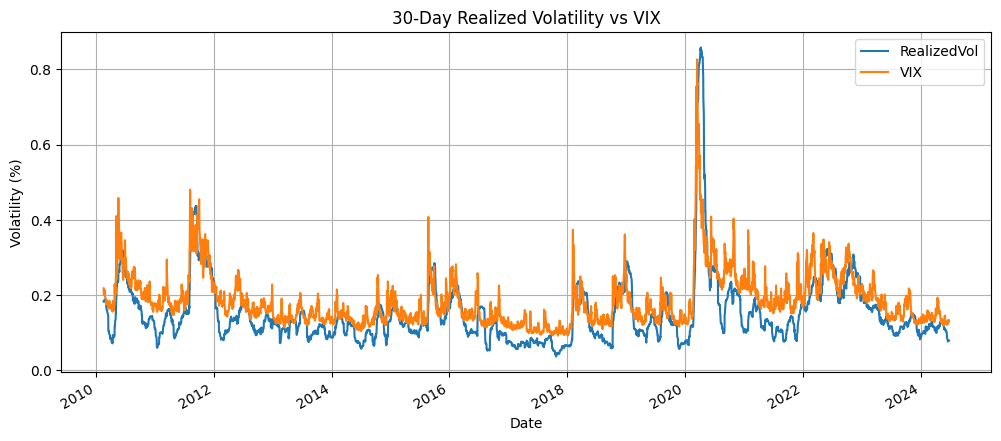

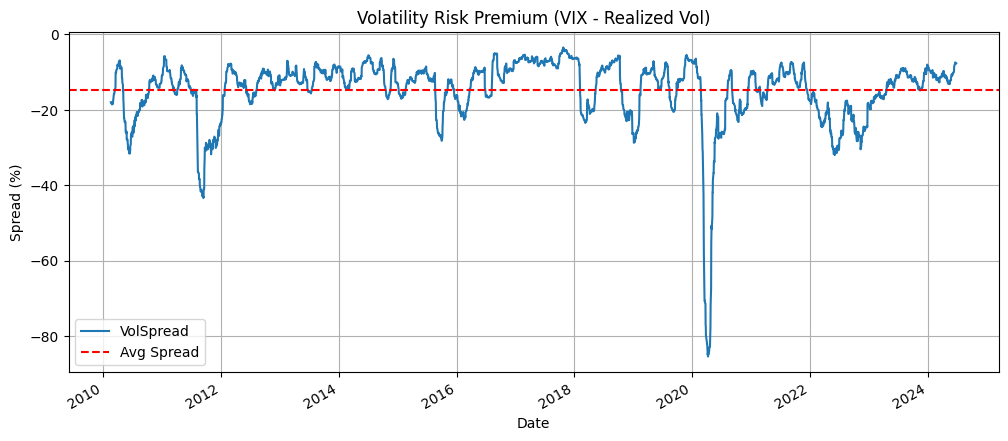

In [139]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define tickers and dates
spx_ticker = "^GSPC"
vix_ticker = "^VIX"
start_date = "2010-01-01"
end_date = "2024-06-26"

# Download data
spx_data = yf.download(spx_ticker, start=start_date, end=end_date)
vix_data = yf.download([vix_ticker], start=start_date, end=end_date)

# Flatten MultiIndex columns
vix_data.columns = [col[0] for col in vix_data.columns]
vix_data = vix_data[['Close']].rename(columns={'Close': 'VIX'})/100

# Compute 30-day realized volatility
spx_data['LogReturn'] = np.log(spx_data['Close'] / spx_data['Close'].shift(1))
spx_data['RealizedVol'] = spx_data['LogReturn'].rolling(30).std() * np.sqrt(252)

# Combine and align
combined = pd.concat([spx_data['RealizedVol'], vix_data['VIX']], axis=1).dropna()

# Compute the spread
combined['VolSpread'] = combined['VIX'] - combined['RealizedVol'] * 100

# Plot realized volatility vs VIX
combined[['RealizedVol', 'VIX']].plot(title='30-Day Realized Volatility vs VIX', figsize=(12, 5))
plt.ylabel("Volatility (%)")
plt.grid(True)
plt.show()

# Plot volatility spread
combined['VolSpread'].plot(title='Volatility Risk Premium (VIX - Realized Vol)', figsize=(12, 5))
plt.axhline(combined['VolSpread'].mean(), color='red', linestyle='--', label='Avg Spread')
plt.ylabel("Spread (%)")
plt.legend()
plt.grid(True)
plt.show()